In [1]:
# 8월 6일 일요일 12시까지
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# from sklearn.tree import export_graphviz
# import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import f_oneway

from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
matplotlib.rc('axes',unicode_minus = False)

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

# matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('font',family='Noto Sans CJK JP')
matplotlib.rc('axes',unicode_minus=False)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

In [3]:
df_raw=pd.read_csv('/home/piai/빅데이터/빅데이터 프로젝트/B3_반도체/7_Path.csv')
df_raw.head()

,No_Die,Lot_Num,Wafer_Num,Ox_Chamber,photo_soft_Chamber,lithography_Chamber,Etching_Chamber,Chamber_Num,Error_message,Error,Mini_Path,Real_Path,Target,Datetime
0,NOLSM325131325,13,28,2,1,1,1,1,none,1,2111,21111,141,01-03-2022
1,NOLSM326132326,13,29,2,1,1,2,2,none,1,2112,21122,55,01-03-2022
2,NOLSM327133327,13,30,2,1,1,3,3,none,1,2113,21133,96,01-03-2022
3,NOLSM328134328,13,31,2,1,1,1,1,none,1,2111,21111,105,01-03-2022
4,NOLSM329135329,13,32,2,1,1,2,2,none,1,2112,21122,79,01-03-2022


In [4]:
df_raw["Datetime"] = pd.to_datetime(df_raw["Datetime"], format="%d-%m-%Y")
df_raw = df_raw.drop(df_raw.index[-1])

In [5]:
df_raw['index'] = df_raw.index
df_raw.sort_values(by="Real_Path", inplace=True)
df_raw.head()

,No_Die,Lot_Num,Wafer_Num,Ox_Chamber,photo_soft_Chamber,lithography_Chamber,Etching_Chamber,Chamber_Num,Error_message,Error,Mini_Path,Real_Path,Target,Datetime,index
27,NOLSM326132,13,2,1,1,1,1,1,none,1,1111,11111,55,2022-03-01,27
927,NOLSM124516,5,16,1,1,1,1,1,none,1,1111,11111,94,2022-02-21,927
1213,NOLSM736287736,28,34,1,1,1,1,1,none,1,1111,11111,123,2022-02-24,1213
435,NOLSM7177,1,34,1,1,1,1,1,none,1,1111,11111,97,2022-02-17,435
1592,NOLSM8233113,31,13,1,1,1,1,1,none,1,1111,11111,45,2022-02-27,1592


In [6]:
# data_count_list = []

# # Mini_Path별로 차트 그리기
# for mini_path in mini_paths:
#     group = grouped.get_group(mini_path)

#     c_chart_data = group["Target"]
#     num_data_points = len(c_chart_data)  # c_chart_data의 갯수

#     error_0_count = group[group["Error"] == 0]["Error"].count()  # Error가 "none"인 갯수 계산
#     data_count_list.append({"mini_path": int(mini_path), "data_count": num_data_points, "error_count":error_0_count})

# # 데이터 리스트로부터 DataFrame 생성
# data_count_df = pd.DataFrame(data_count_list)

# # 결과 출력
# # data_count_df
# data_count_df.sort_values(by="data_count", inplace=True)
# pd.set_option("display.max_rows", None)

# # data_count_df DataFrame 출력
# data_count_df.head()

In [7]:
# Mini_Path를 기준으로 데이터 그룹화
grouped = df_raw.groupby("Real_Path")

# Mini_Path 리스트 생성
real_paths = df_raw["Real_Path"].unique()

# 큰 편차 저장 리스트
max_deviation_values = []
# 작은 편차 리스트
min_deviation_values = []
# 안정, 불안정 카운트 리스트
status_counts = []

# Mini_Path별로 차트 그리기
for real_path in real_paths:
    group = grouped.get_group(real_path)

    c_chart_data = group["Target"]
    timestamps = group["index"]
    error_data = group["Error"]

    num_data_points = len(c_chart_data)
    if num_data_points <= 10:  # 데이터 갯수가 10 이하인 경우 처리하지 않음
        continue

    mean = c_chart_data.mean()
    UCL = mean + (3 * np.sqrt(mean))
    LCL = mean - (3 * np.sqrt(mean))

    deviations = np.abs(c_chart_data - mean)
    max_deviations = deviations.nlargest(5)  # 가장 큰 5개의 편차 값을 구합니다.
    # max_deviation_values.append({real_path: max_deviations.tolist()})
    max_deviation_targets = group.loc[max_deviations.index, "Target"]  # 가장 큰 편차 값의 Target을 가져옵니다.
    max_deviation_values.append({real_path: max_deviation_targets.tolist()})

    deviations = np.abs(c_chart_data - mean)
    min_deviations = deviations.nsmallest(5)  # 가장 큰 5개의 편차 값을 구합니다.
    # min_deviation_values.append({real_path: min_deviations.tolist()})
    min_deviation_targets = group.loc[min_deviations.index, "Target"]  # 가장 작은 편차 값의 Target을 가져옵니다.
    min_deviation_values.append({real_path: min_deviation_targets.tolist()})

    stability_count = 0
    instability_count = 0
    error_count = 0

    for value in c_chart_data:
        if LCL <= value <= UCL:
            stability_count += 1
        else:
            instability_count += 1

    for ed in error_data:
        if ed==0:
            error_count += 1
    status_counts.append({real_path: {"stability": stability_count, "instability": instability_count, "defective":error_count}})

    # plt.figure(figsize=(5, 5))
    # plt.scatter(timestamps, c_chart_data, marker='o', color='blue', label='불량 개수')  # timestamps를 그대로 사용
    # plt.axhline(mean, color='red', linestyle='dashed', label='CL')
    # plt.axhline(UCL, color='green', linestyle='dashed', label='UCL')
    # plt.axhline(LCL, color='purple', linestyle='dashed', label='LCL')
    # plt.title(f"Mini_Path {int(mini_path)}")
    # plt.xlabel('날짜')
    # plt.ylabel('불량 개수')
    # plt.legend()
    # plt.xticks(rotation=45)  # x축 레이블 회전
    # plt.tight_layout()

    # plt.show()


In [8]:
# 새로운 데이터 형식으로 변환
max_deviation_data_list = []
for item in max_deviation_values:
    for mini_path, worst_values in item.items():
        new_item = {"real_path": real_path}
        for i, worst_value in enumerate(worst_values, start=1):
            new_item[f"worst{i}"] = worst_value
        max_deviation_data_list.append(new_item)

# DataFrame 생성
max_deviation_data_df = pd.DataFrame(max_deviation_data_list)
max_deviation_data_df["real_path"] = max_deviation_data_df["real_path"].astype(int)

# 결과 출력
max_deviation_data_df.head()

,real_path,worst1,worst2,worst3,worst4,worst5
0,33333,204,148,39,146,45
1,33333,156,15,143,24,27
2,33333,229,201,192,180,15
3,33333,230,216,48,54,72
4,33333,216,207,9,15,171


In [9]:
# 새로운 데이터 형식으로 변환
min_deviation_data_list = []
for item in min_deviation_values:
    for real_path, worst_values in item.items():
        new_item = {"real_path": real_path}
        for i, worst_value in enumerate(worst_values, start=1):
            new_item[f"best{i}"] = worst_value
        min_deviation_data_list.append(new_item)

# DataFrame 생성
min_deviation_data_df = pd.DataFrame(min_deviation_data_list)
min_deviation_data_df["real_path"] = min_deviation_data_df["real_path"].astype(int)

# 결과 출력
min_deviation_data_df.head()

,real_path,best1,best2,best3,best4,best5
0,11111,93,94,96,97,97
1,11122,75,92,99,102,102
2,11133,96,95,94,100,92
3,11211,117,124,102,138,96
4,11222,96,96,96,91,99


In [10]:
# 데이터 리스트에서 딕셔너리 키와 값 추출
real_path = [list(item.keys())[0] for item in status_counts]
stabilities = [list(item.values())[0]['stability'] for item in status_counts]
instabilities = [list(item.values())[0]['instability'] for item in status_counts]
instabilities_rate = [list(item.values())[0]['instability']/(list(item.values())[0]['instability']+list(item.values())[0]['stability']) for item in status_counts]
defective_count = [list(item.values())[0]['defective'] for item in status_counts]

# DataFrame 생성
status_counts_data_df = pd.DataFrame({
    'real_path': real_path,
    'stability': stabilities,
    'instability': instabilities,
    'instabilities_rate': instabilities_rate,
    'defective_count': defective_count
})

status_counts_data_df.head()

,real_path,stability,instability,instabilities_rate,defective_count
0,11111,16,13,0.448276,1
1,11122,6,6,0.500000,0
2,11133,16,14,0.466667,2
3,11211,6,6,0.500000,2
4,11222,24,17,0.414634,2


In [11]:
status_counts_data_df.sort_values(by="instabilities_rate", inplace=True)
status_counts_data_df.head(10)

,real_path,stability,instability,instabilities_rate,defective_count
19,13122,9,3,0.250000,1
13,12222,24,8,0.250000,3
30,21211,8,3,0.272727,1
61,33222,24,10,0.294118,1
14,12233,8,4,0.333333,0
5,11233,8,4,0.333333,2
21,13211,8,4,0.333333,0
48,23333,17,9,0.346154,1
11,12133,17,12,0.413793,1
8,11333,17,12,0.413793,1


In [12]:
status_counts_data_df.tail(10)

,real_path,stability,instability,instabilities_rate,defective_count
28,21122,4,8,0.666667,0
12,12211,4,8,0.666667,1
37,22122,4,8,0.666667,2
50,31133,8,17,0.680000,4
38,22133,7,17,0.708333,5
59,33111,7,18,0.720000,0
20,13133,6,16,0.727273,3
25,13322,3,9,0.750000,0
32,21233,3,9,0.750000,1
23,13233,2,9,0.818182,0


안정 후보: 12222, 33222<br>불안정 후보: 22133, 31133

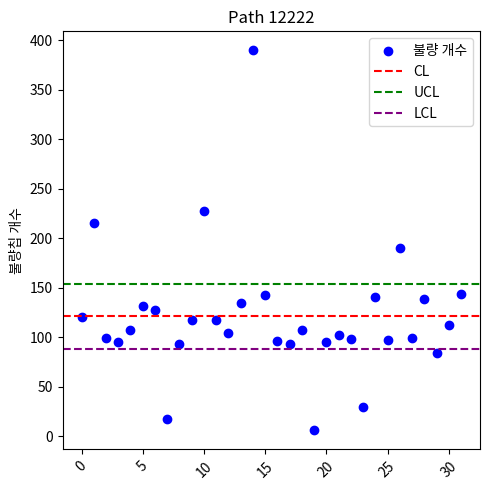

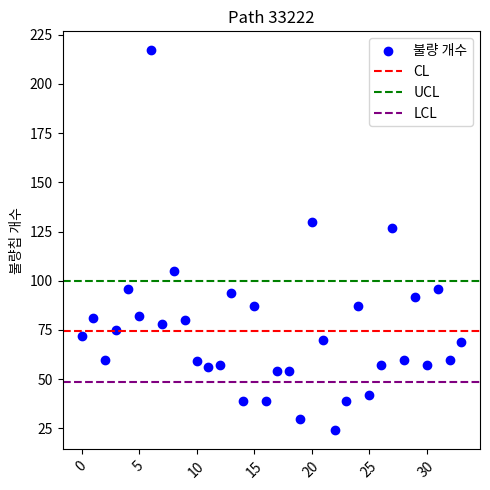

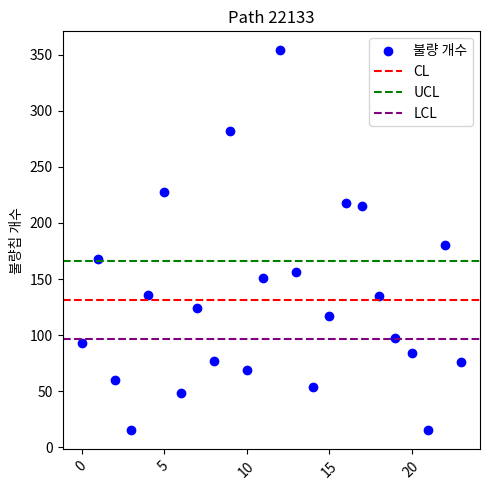

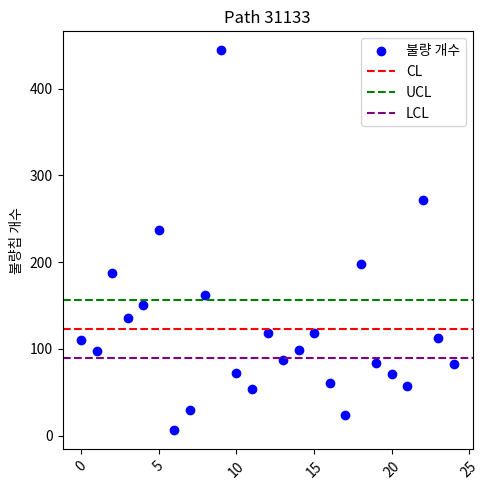

In [13]:
# Mini_Path를 기준으로 데이터 그룹화
grouped = df_raw.groupby("Real_Path")

# Mini_Path 리스트 생성
real_paths = df_raw["Real_Path"].unique()

# Mini_Path별로 차트 그리기
for real_path in [12222,33222,22133,31133]:
    # group = df_raw[df_raw["Mini_Path"] == mini_path] 이거 교수님 코드
    # group.reset_index(drop = True, inplace = True) 이거 교수님 코드
    group = grouped.get_group(real_path)
    group.reset_index(drop = True, inplace = True)
    
    c_chart_data = group["Target"]
    timestamps = group.index
    error_data = group["Error"]

    num_data_points = len(c_chart_data)
    if num_data_points <= 10:  # 데이터 갯수가 10 이하인 경우 처리하지 않음
        continue

    mean = c_chart_data.mean()
    UCL = mean + (3 * np.sqrt(mean))
    LCL = mean - (3 * np.sqrt(mean))

    plt.figure(figsize=(5, 5))
    plt.scatter(timestamps, c_chart_data, marker='o', color='blue', label='불량 개수')  # timestamps를 그대로 사용
    plt.axhline(mean, color='red', linestyle='dashed', label='CL')
    plt.axhline(UCL, color='green', linestyle='dashed', label='UCL')
    plt.axhline(LCL, color='purple', linestyle='dashed', label='LCL')
    # plt.ylim(0, 500)
    plt.title(f"Path {int(real_path)}")
    # plt.xlabel('날짜')
    plt.ylabel('불량칩 개수')
    plt.legend()
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.tight_layout()

    plt.show()


안정 후보 1순위: 33222<br>불안정 후보 1순위: 22133

In [14]:
df_raw.head()

,No_Die,Lot_Num,Wafer_Num,Ox_Chamber,photo_soft_Chamber,lithography_Chamber,Etching_Chamber,Chamber_Num,Error_message,Error,Mini_Path,Real_Path,Target,Datetime,index
27,NOLSM326132,13,2,1,1,1,1,1,none,1,1111,11111,55,2022-03-01,27
927,NOLSM124516,5,16,1,1,1,1,1,none,1,1111,11111,94,2022-02-21,927
1213,NOLSM736287736,28,34,1,1,1,1,1,none,1,1111,11111,123,2022-02-24,1213
435,NOLSM7177,1,34,1,1,1,1,1,none,1,1111,11111,97,2022-02-17,435
1592,NOLSM8233113,31,13,1,1,1,1,1,none,1,1111,11111,45,2022-02-27,1592


In [15]:
count_3322 = len(df_raw.loc[(df_raw["Real_Path"] == 33222) & (df_raw["Error"] == 0)])
count_2213 = len(df_raw.loc[(df_raw["Real_Path"] == 22133) & (df_raw["Error"] == 0)])

print("Path 33222의 불량품 갯수:", count_3322)
print("Path 22133의 불량품 갯수:", count_2213)

Path 33222의 불량품 갯수: 1
Path 22133의 불량품 갯수: 5


In [16]:
# max_deviation_values, min_deviation_values

max_deviation_values_33222 = None
min_deviation_values_33222 = None
max_deviation_values_22133 = None
min_deviation_values_22133 = None


for dct in max_deviation_values:
    if 33222 in dct:
        max_deviation_values_33222 = dct
    elif 22133 in dct:
        max_deviation_values_22133 = dct
    if (max_deviation_values_33222 != None) and (max_deviation_values_22133!= None):
        break

for dct in min_deviation_values:
    if 33222 in dct:
        min_deviation_values_33222 = dct
    elif 22133 in dct:
        min_deviation_values_22133 = dct
    if (min_deviation_values_33222 != None) and (min_deviation_values_22133!= None):
        break

print("max_deviation_values_33222: ", max_deviation_values_33222)
print("max_deviation_values_22133: ", max_deviation_values_22133)
print("min_deviation_values_33222: ", min_deviation_values_33222)
print("min_deviation_values_22133: ", min_deviation_values_22133)

max_deviation_values_33222:  {33222: [217, 130, 127, 24, 30]}
max_deviation_values_22133:  {22133: [354, 282, 15, 15, 228]}
min_deviation_values_33222:  {33222: [75, 72, 78, 70, 69]}
min_deviation_values_22133:  {22133: [135, 136, 124, 117, 151]}


In [17]:
def calculate_sum(lst):
    return sum(lst)

max_deviation_values_33222_sum = calculate_sum(max_deviation_values_33222[33222])
max_deviation_values_22133_sum = calculate_sum(max_deviation_values_22133[22133])
min_deviation_values_33222_sum = calculate_sum(min_deviation_values_33222[33222])
min_deviation_values_22133_sum = calculate_sum(min_deviation_values_22133[22133])


print("max_deviation_values_33222_sum:", max_deviation_values_33222_sum)
print("max_deviation_values_22133_sum:", max_deviation_values_22133_sum)
print("min_deviation_values_33222_sum:", min_deviation_values_33222_sum)
print("min_deviation_values_22133_sum:", min_deviation_values_22133_sum)

max_deviation_values_33222_sum: 528
max_deviation_values_22133_sum: 894
min_deviation_values_33222_sum: 364
min_deviation_values_22133_sum: 663


In [18]:
# 안정적인 path
# data_33222 = {
#     "양품": [5*2000-min_deviation_values_33222_sum, 5*2000-max_deviation_values_33222_sum],
#     "불량": [min_deviation_values_33222_sum, max_deviation_values_33222_sum]
# }

# data_33222_df = pd.DataFrame(data_33222, index=["안정", "불안정"])
# data_33222_df

data_33222 = {
    "안정": [5*2000-min_deviation_values_33222_sum, min_deviation_values_33222_sum],
    "불안정": [5*2000-max_deviation_values_33222_sum, max_deviation_values_33222_sum]
}
data_33222_df = pd.DataFrame(data_33222, index=["양품", "불량"])
data_33222_df

,안정,불안정
양품,9636,9472
불량,364,528


In [19]:
# 불안정적인 path
# data_22133 = {
#     "양품": [5*2000-min_deviation_values_22133_sum, 5*2000-max_deviation_values_22133_sum],
#     "불량": [min_deviation_values_22133_sum, max_deviation_values_22133_sum]
# }

# data_22133_df = pd.DataFrame(data_22133, index=["안정", "불안정"])
# data_22133_df
data_22133 = {
    "안정": [5*2000-min_deviation_values_22133_sum, min_deviation_values_22133_sum],
    "불안정": [5*2000-max_deviation_values_22133_sum, max_deviation_values_22133_sum]
}
    
data_22133_df = pd.DataFrame(data_22133, index=["양품", "불량"])
data_22133_df

,안정,불안정
양품,9337,9106
불량,663,894


In [45]:
data = {
    "상태": ["안정", "불안정"],
    "양품": [9337, 9106],
    "불량": [663, 894]
}

df = pd.DataFrame(data)

# 교차표 생성
# cross_tab = pd.crosstab(index=df["상태"], columns=[df["양품"], df["불량"]], values=[df["양품"], df["불량"]], aggfunc='sum')
cross_tab = pd.crosstab(index=df["상태"], columns=df["양품"], values=df["양품"], aggfunc='sum')

# 결과 출력
cross_tab
# df["상태"]

양품,9106,9337
상태,,
불안정,9106.0,NaN
안정,NaN,9337.0


In [47]:
chi, pval, dof, expected = stats.chi2_contingency(data_33222_df)
# chi-square test 결과 출력
print("안정 Path")
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree pf freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))


chi, pval, dof, expected = stats.chi2_contingency(data_22133_df)
# chi-square test 결과 출력
print("\n\n불안정 Path")
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree pf freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

안정 Path
chisq : 31.176
p : 0.000
degree pf freedom : 1
expected value : 
[[9554. 9554.]
 [ 446.  446.]]


불안정 Path
chisq : 36.844
p : 0.000
degree pf freedom : 1
expected value : 
[[9221.5  778.5]
 [9221.5  778.5]]
양품     9106    9337
상태                 
불안정  9106.0     NaN
안정      NaN  9337.0


In [51]:
data_all = {
    "안정": [19108, 892],
    "불안정": [18443, 1557]
}
data_all_df = pd.DataFrame(data_all, index=["양품", "불량"])
data_all_df

,안정,불안정
양품,19108,18443
불량,892,1557


In [54]:
chi, pval, dof, expected = stats.chi2_contingency(data_all_df)
# chi-square test 결과 출력
print("안정Path와 불안정Path")
print('\nchisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree pf freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

안정Path와 불안정Path

chisq : 191.772
p : 0.000
degree pf freedom : 1
expected value : 
[[18775.5 18775.5]
 [ 1224.5  1224.5]]


In [21]:
# # df = pd.DataFrame(data, index=["양품", "불량"])
# print(data_33222_df.loc["불량"]["안정"])
# print(data_33222_df.loc["양품"])
# print(data_33222_df.loc["불량"])
# data_33222_df["안정 불량 비율"] = data_33222_df.loc["불량"]["안정"] / (data_33222_df.loc["양품"]["안정"] + data_33222_df.loc["불량"]["안정"])
# data_33222_df["불안정 불량 비율"] = data_33222_df.loc["불량"]["불안정"] / (data_33222_df.loc["양품"]["불안정"] + data_33222_df.loc["불량"]["불안정"])
# # data_33222_df["안정 불량 비율"]

# # 불량 비율에 대한 막대 그래프 그리기
# ax = data_33222_df[["안정 불량 비율", "불안정 불량 비율"]].plot(kind="bar")
# ax.set_ylabel("불량 비율")
# ax.set_xlabel("카테고리")
# ax.set_title("안정 및 불안정 상태에서의 불량 비율")

# plt.show()

# plt.show()

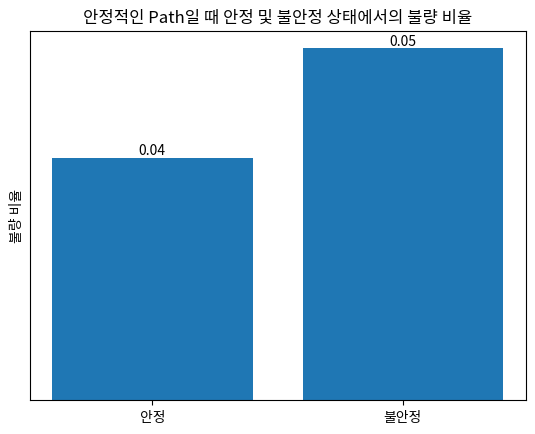

In [22]:
stability_defective_rate = 364 / (9636 + 364)
instability_defective_rate = 528 / (9472 + 528)

# 카테고리 및 불량 비율 리스트
categories = ["안정", "불안정"]
defective_rates = [stability_defective_rate, instability_defective_rate]

# 막대 그래프 그리기
bars = plt.bar(categories, defective_rates)
plt.ylabel("불량 비율")
plt.title("안정적인 Path일 때 안정 및 불안정 상태에서의 불량 비율")

# 막대 위에 숫자 표시
for bar, rate in zip(bars, defective_rates):
    plt.text(bar.get_x() + bar.get_width() / 2, rate, f"{rate:.2f}", ha="center", va="bottom")

# y축 값 제거
plt.yticks([])
plt.show()

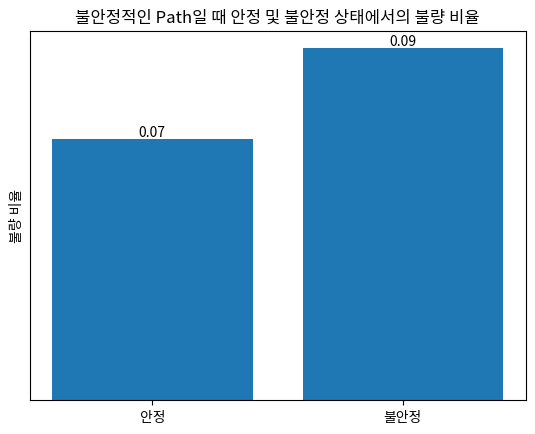

In [23]:
stability_defective_rate = 663 / (9337 + 663)
instability_defective_rate = 894 / (9106 + 894)

# 카테고리 및 불량 비율 리스트
categories = ["안정", "불안정"]
defective_rates = [stability_defective_rate, instability_defective_rate]

# 막대 그래프 그리기
bars = plt.bar(categories, defective_rates)
plt.ylabel("불량 비율")
plt.title("불안정적인 Path일 때 안정 및 불안정 상태에서의 불량 비율")

# 막대 위에 숫자 표시
for bar, rate in zip(bars, defective_rates):
    plt.text(bar.get_x() + bar.get_width() / 2, rate, f"{rate:.2f}", ha="center", va="bottom")

# y축 값 제거
plt.yticks([])
plt.show()

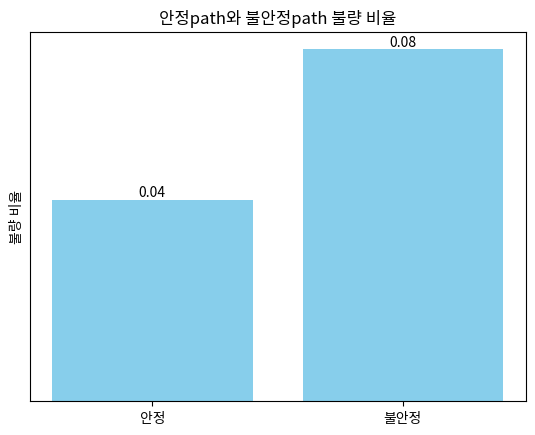

In [24]:
stability_defective_rate = (364+528) / (9636+9472+364+528)
instability_defective_rate = (663+894) / (9337+9106+663+894)

# 카테고리 및 불량 비율 리스트
categories = ["안정", "불안정"]
defective_rates = [stability_defective_rate, instability_defective_rate]

# 막대 그래프 그리기
bars = plt.bar(categories, defective_rates, color="skyblue")
plt.ylabel("불량 비율")
plt.title("안정path와 불안정path 불량 비율")

# 막대 위에 숫자 표시
for bar, rate in zip(bars, defective_rates):
    plt.text(bar.get_x() + bar.get_width() / 2, rate, f"{rate:.2f}", ha="center", va="bottom")

# y축 값 제거
plt.yticks([])
plt.show()